In [1]:
#Primeramente debemos cargar los bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Leemos cada archivo
df0 = pd.read_csv("sargento_201117.csv", skiprows=1, sep=",", header=None, names=["#","Date Time","Pres (kPa)","Temp (°C)","Water Level (m)"])
df1 = pd.read_csv("sargento_salinidad_201117.csv", skiprows=1, sep=",", header=None, names=["#","Date Time","Cond High Rng (?S/cm)","Temp (°C)","Conductance (?S/cm)","Salinity (ppt)"])

In [3]:
#Removemos la columna de valores
df0 = df0.drop(["#"],1)
df0.head()

,Date Time,Pres (kPa),Temp (°C),Water Level (m)
0,10/26/2017 13:00:00,105.612,24.448,-0.150
1,10/26/2017 13:15:00,105.513,24.351,-0.160
2,10/26/2017 13:30:00,105.433,24.351,-0.168
3,10/26/2017 13:45:00,105.385,24.351,-0.173
4,10/26/2017 14:00:00,105.321,24.351,-0.179


In [4]:
#Removemos la columna de valores
df1 = df1.drop(["#"],1)
df1.head()

,Date Time,Cond High Rng (?S/cm),Temp (°C),Conductance (?S/cm),Salinity (ppt)
0,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588
1,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
2,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794
3,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875
4,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036


In [5]:
#Vemos el tipo de datos que incluye cada DataFrame
df0.dtypes

Date Time           object
Pres (kPa)         float64
Temp (°C)          float64
Water Level (m)    float64
dtype: object

In [6]:
#Vemos el tipo de datos que incluye cada DataFrame
df1.dtypes

Date Time                 object
Cond High Rng (?S/cm)    float64
Temp (°C)                float64
Conductance (?S/cm)      float64
Salinity (ppt)           float64
dtype: object

In [7]:
#Necesitamos que las fechas sean variables temporales y no objetos
df0['Ndate'] = pd.to_datetime(df0['Date Time'], format='%m/%d/%Y %H:%M:%S')
df0['month'] = df0['Ndate'].dt.month
df0.head()

,Date Time,Pres (kPa),Temp (°C),Water Level (m),Ndate,month
0,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10
1,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
2,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
3,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
4,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10


In [8]:
#Necesitamos que las fechas sean variables temporales y no objetos
df1['Ndate'] = pd.to_datetime(df1['Date Time'], format='%m/%d/%Y %H:%M:%S')
df1['month'] = df1['Ndate'].dt.month
df1.head()

,Date Time,Cond High Rng (?S/cm),Temp (°C),Conductance (?S/cm),Salinity (ppt),Ndate,month
0,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588,2017-10-26 13:00:00,10
1,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
2,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
3,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10
4,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10


In [9]:
df0.describe()

,Pres (kPa),Temp (°C),Water Level (m),month
count,2394.000000,2394.000000,2394.000000,2394.000000
mean,107.430007,23.120883,0.030863,10.781119
std,2.371844,0.563555,0.235974,0.413574
min,104.229000,21.760000,-0.288000,10.000000
25%,106.407000,22.525000,-0.071000,11.000000
50%,106.764000,23.388000,-0.035000,11.000000
75%,107.305000,23.484000,0.018750,11.000000
max,118.641000,24.448000,1.146000,11.000000


In [10]:
df1.describe()

,Cond High Rng (?S/cm),Temp (°C),Conductance (?S/cm),Salinity (ppt),month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,54524.972807,23.316646,56386.831662,37.479737,10.781119
std,11.876669,0.547033,619.501987,0.464974,0.413574
min,54105.700000,21.490000,54622.100000,36.158800,10.000000
25%,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,54525.500000,24.910000,58398.700000,38.994200,11.000000


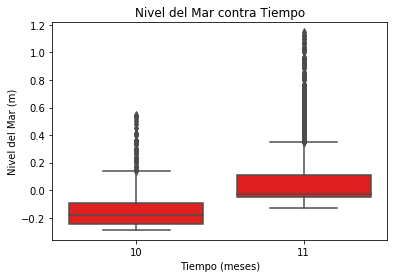

In [11]:
#Creamos la gráfica de NIVEL DEL MAR CONTRA TIEMPO
NMvsT = sns.boxplot(x="month", y="Water Level (m)", data=df0, color="red")

plt.title("Nivel del Mar contra Tiempo")
plt.ylabel("Nivel del Mar (m)")
plt.xlabel("Tiempo (meses)")

plt.show()

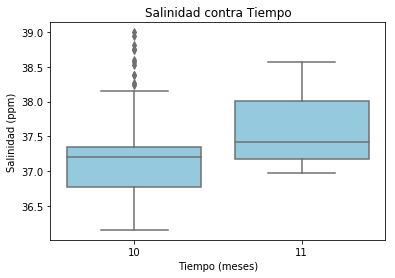

In [12]:
#Creamos la gráfica de SALINIDAD CONTRA TIEMPO
SvsT = sns.boxplot(x="month", y="Salinity (ppt)", data=df1, color="skyblue")

plt.title("Salinidad contra Tiempo")
plt.ylabel("Salinidad (ppm)")
plt.xlabel("Tiempo (meses)")

plt.show()

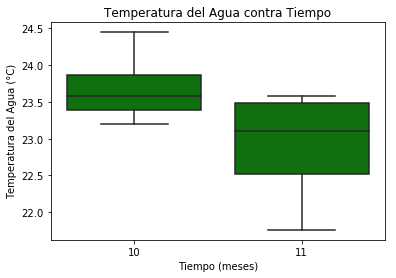

In [13]:
#Creamos la gráfica de TEMPERATURA DEL AGUA CONTRA TIEMPO
SvsT = sns.boxplot(x="month", y="Temp (°C)", data=df0, color="green")

plt.title("Temperatura del Agua contra Tiempo")
plt.ylabel("Temperatura del Agua (°C)")
plt.xlabel("Tiempo (meses)")

plt.show()

In [14]:
#Lo siguiente es unir df0 y df1 en un sólo DataFrame para poder generar las siguientes gráficas
#Primero hemos de remover aquellos datos repetidos en df1
df1=df1.drop(["Date Time","Temp (°C)","Ndate","month"],1)
df1.head()


,Cond High Rng (?S/cm),Conductance (?S/cm),Salinity (ppt)
0,54525.5,54622.1,36.1588
1,54525.5,54719.0,36.2311
2,54525.5,54783.8,36.2794
3,54525.5,54794.6,36.2875
4,54525.5,54816.2,36.3036


In [15]:
#Como ya removimos los datos repetidos podemos hacer la unión en un nuevo DataFrame
df2=pd.concat([df0, df1], axis=1, join_axes=[df1.index])
df2.head()

,Date Time,Pres (kPa),Temp (°C),Water Level (m),Ndate,month,Cond High Rng (?S/cm),Conductance (?S/cm),Salinity (ppt)
0,10/26/2017 13:00:00,105.612,24.448,-0.150,2017-10-26 13:00:00,10,54525.5,54622.1,36.1588
1,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10,54525.5,54719.0,36.2311
2,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10,54525.5,54783.8,36.2794
3,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10,54525.5,54794.6,36.2875
4,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10,54525.5,54816.2,36.3036


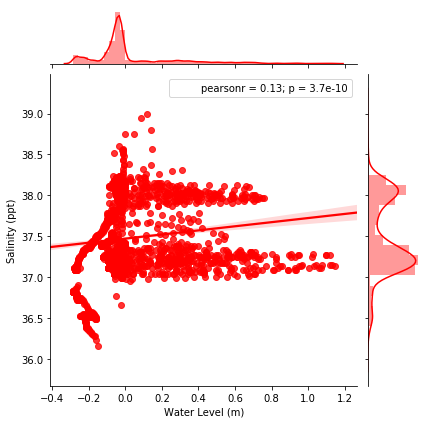

In [16]:
#Correlación entre NIVEL DEL MAR-SALINIDAD
#sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x="Water Level (m)", y="Salinity (ppt)", data=df2, kind="reg", color="r")#, size=7)
plt.show()

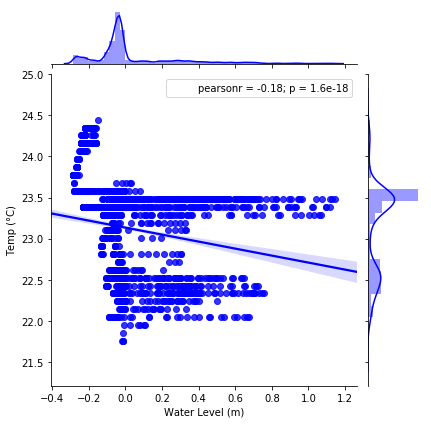

In [17]:
#Correlación entre NIVEL DEL MAR-TEMPERATURA DEL AGUA
#sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x="Water Level (m)", y="Temp (°C)", data=df2, kind="reg", color="b")#, size=7)
plt.show()

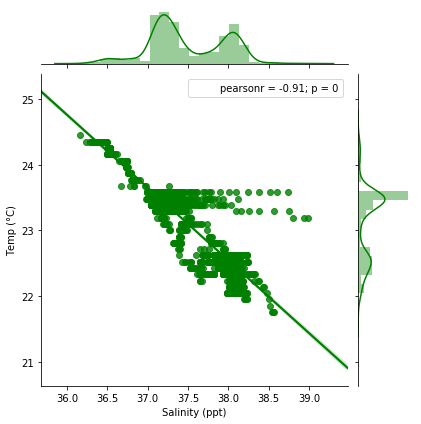

In [18]:
#Correlación entre SALINIDAD-TEMPERATURA DEL AGUA
#sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x="Salinity (ppt)", y="Temp (°C)", data=df2, kind="reg", color="g")#, size=7)
plt.show()

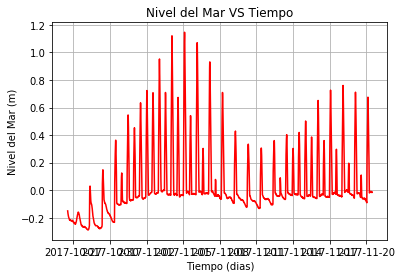

In [33]:
#El siguiente paso indica crear tres gráficas distintas:
#Nivel del Mar VS Tiempo
WaterLevel=df2["Water Level (m)"]
Time=df2["Ndate"]

plt.plot_date(x=Time, y=WaterLevel, fmt="r-")
plt.title("Nivel del Mar VS Tiempo")
plt.ylabel("Nivel del Mar (m)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

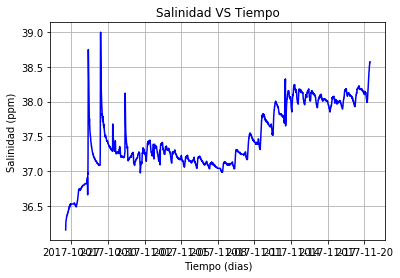

In [34]:
#Salinidad VS Tiempo
Salinity=df2["Salinity (ppt)"]

plt.plot_date(x=Time, y=Salinity, fmt="b-")
plt.title("Salinidad VS Tiempo")
plt.ylabel("Salinidad (ppm)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

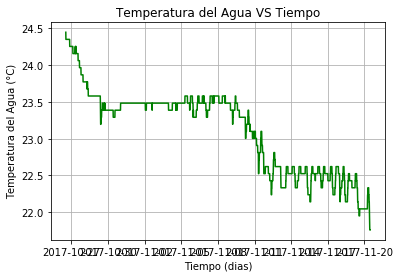

In [35]:
#Temperatura del Agua VS Tiempo
TemperaturaAgua=df2["Temp (°C)"]

plt.plot_date(x=Time, y=TemperaturaAgua, fmt="g-")
plt.title("Temperatura del Agua VS Tiempo")
plt.ylabel("Temperatura del Agua (°C)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

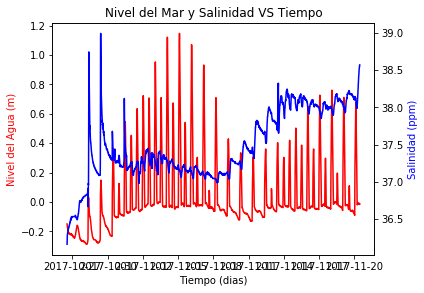

In [47]:
#Ahora crearemos gráficas con un eje vertical doble...
#Primero, Nivel del Mar y Salinidad VS Tiempo
NM_S, ax1 = plt.subplots()

ax1.plot(Time, WaterLevel, "r-")
ax1.set_xlabel("Tiempo (dias)")
ax1.set_ylabel("Nivel del Agua (m)", color="r")

ax2=ax1.twinx()
ax2.plot(Time, Salinity, "b-")
ax2.set_ylabel("Salinidad (ppm)", color="b")

NM_S.tight_layout()
plt.title("Nivel del Mar y Salinidad VS Tiempo")
plt.show()

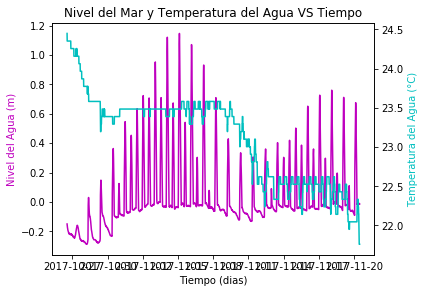

In [57]:
#Segundo, Nivel del Mar y Temperatura del Agua VS Tiempo
NM_S, ax1 = plt.subplots()

ax1.plot(Time, WaterLevel, "m-")
ax1.set_xlabel("Tiempo (dias)")
ax1.set_ylabel("Nivel del Agua (m)", color="m")

ax2=ax1.twinx()
ax2.plot(Time, TemperaturaAgua, "c-")
ax2.set_ylabel("Temperatura del Agua (°C)", color="c")

NM_S.tight_layout()
plt.title("Nivel del Mar y Temperatura del Agua VS Tiempo")
plt.show()

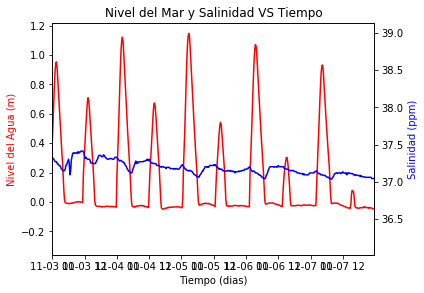

In [59]:
#Nuestro último requisito es analizar nuevamente las gráficas anteriores en un intervalo de 5 días
#Primero, Nivel del Mar y Salinidad VS Tiempo
NM_S, ax1 = plt.subplots()

ax1.plot(Time, WaterLevel, "r-")
ax1.set_xlabel("Tiempo (dias)")
ax1.set_ylabel("Nivel del Agua (m)", color="r")

ax2=ax1.twinx()
ax2.plot(Time, Salinity, "b-")
ax2.set_ylabel("Salinidad (ppm)", color="b")

plt.xlim(["2017-11-03 00:00:00","2017-11-07 23:45:00"])

NM_S.tight_layout()
plt.title("Nivel del Mar y Salinidad VS Tiempo")
plt.show()

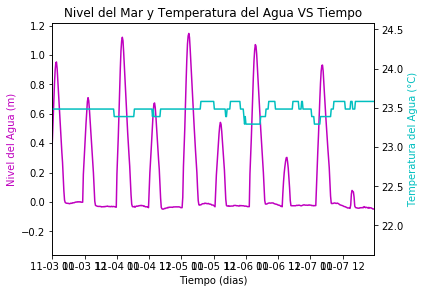

In [60]:
#Segundo, Nivel del Mar y Temperatura del Agua VS Tiempo
NM_S, ax1 = plt.subplots()

ax1.plot(Time, WaterLevel, "m-")
ax1.set_xlabel("Tiempo (dias)")
ax1.set_ylabel("Nivel del Agua (m)", color="m")

ax2=ax1.twinx()
ax2.plot(Time, TemperaturaAgua, "c-")
ax2.set_ylabel("Temperatura del Agua (°C)", color="c")

plt.xlim(["2017-11-03 00:00:00","2017-11-07 23:45:00"])

NM_S.tight_layout()
plt.title("Nivel del Mar y Temperatura del Agua VS Tiempo")
plt.show()